# Analyse Exploratoire

### Import des modules

In [659]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

### Analyse Exploratoire

In [660]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [661]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [662]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [663]:
building_consumption.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [664]:
# On supprime les colonnes avec des valeurs uniques
building_consumption = building_consumption.drop(["DataYear","OSEBuildingID","City","State","TaxParcelIdentificationNumber"],axis = 1) 

In [665]:
# On conserve uniquement la colonne du quartier et supprimer les colonnes redondantes comme le code postal,
## ,addresse, la latitude et la longitude.
building_consumption = building_consumption.drop(["Address","ZipCode","Latitude","Longitude","CouncilDistrictCode"],axis = 1)


In [666]:
# On supprime ListOfAllPropertyUseTypes car il s’agit du résumé des usages primaire, secondaire et tertiaire.
# On supprime également le nom de la propriété car il est unique pour chaque bâtiment.

building_consumption = building_consumption.drop(["ListOfAllPropertyUseTypes","PropertyName"],axis = 1) 

In [667]:
# On supprime ces colonnes car elles nous sevent à rien pour la prediction

building_consumption = building_consumption.drop(["YearsENERGYSTARCertified","Comments","Outlier"],axis = 1)  

In [668]:
building_consumption.Neighborhood.unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [669]:
## On ajuste les catégories dans la colonne neighborhood pour éviter les doublons.
def adjust_delridge(val):
    if val == "delridge neighborhoods":
        val = "delridge"
    return val

building_consumption["Neighborhood"] = building_consumption["Neighborhood"].str.lower().map(adjust_delridge)

### Les Valeurs Manquentes

In [670]:
building_consumption.isnull().sum()

BuildingType                          0
PrimaryPropertyType                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
ENERGYSTARScore                     843
SiteEUI(kBtu/sf)                      7
SiteEUIWN(kBtu/sf)                    6
SourceEUI(kBtu/sf)                    9
SourceEUIWN(kBtu/sf)                  9
SiteEnergyUse(kBtu)                   5
SiteEnergyUseWN(kBtu)                 6
SteamUse(kBtu)                        9
Electricity(kWh)                      9
Electricity(kBtu)                     9


In [671]:
## On impute les valeurs manquantes des colonnes second property use et third property use avec la catégorie None, 
## ce qui signifie que le bâtiment n’a qu’un seul usage dans ce cas et les valuers de GFA est 0
mask = building_consumption["SecondLargestPropertyUseType"].isnull()
mask_2 = building_consumption["SecondLargestPropertyUseTypeGFA"].isnull()
mask_3 = building_consumption["ThirdLargestPropertyUseType"].isnull()
mask_4 = building_consumption["ThirdLargestPropertyUseTypeGFA"].isnull()

building_consumption.loc[mask, "SecondLargestPropertyUseType"] = "None"
building_consumption.loc[mask_2, "SecondLargestPropertyUseTypeGFA"] = 0
building_consumption.loc[mask_3, "ThirdLargestPropertyUseType"] = "None"
building_consumption.loc[mask_4, "ThirdLargestPropertyUseTypeGFA"] = 0

In [672]:
## on supprimoe les 20 lignes ayant les plus grandes valeurs de primary use et de GFA, car on ne peut pas les imputer
mask = (building_consumption["LargestPropertyUseType"].isnull()) & (building_consumption["LargestPropertyUseTypeGFA"].isnull())

building_consumption = building_consumption[~mask]

0.3950778934393824 75.0


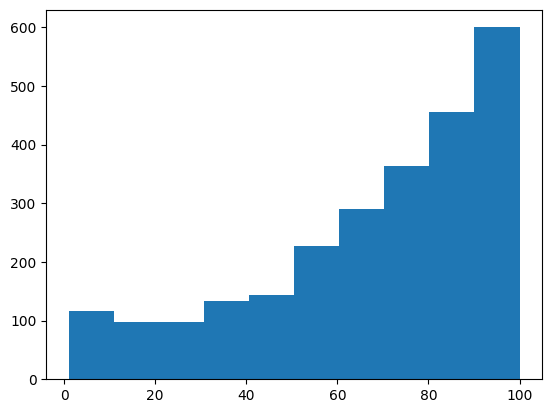

In [673]:
## Nous imputons le score énergétique avec la médiane car le coefficient de variation est un peu élevé et le score est compris entre 0 et 100.
CV = building_consumption["ENERGYSTARScore"].std()/ building_consumption["ENERGYSTARScore"].mean()
plt.hist(building_consumption["ENERGYSTARScore"])
print(CV,building_consumption["ENERGYSTARScore"].median())
plt.show()
mask = building_consumption["ENERGYSTARScore"].isnull()
building_consumption.loc[mask,"ENERGYSTARScore"] = building_consumption["ENERGYSTARScore"].median()

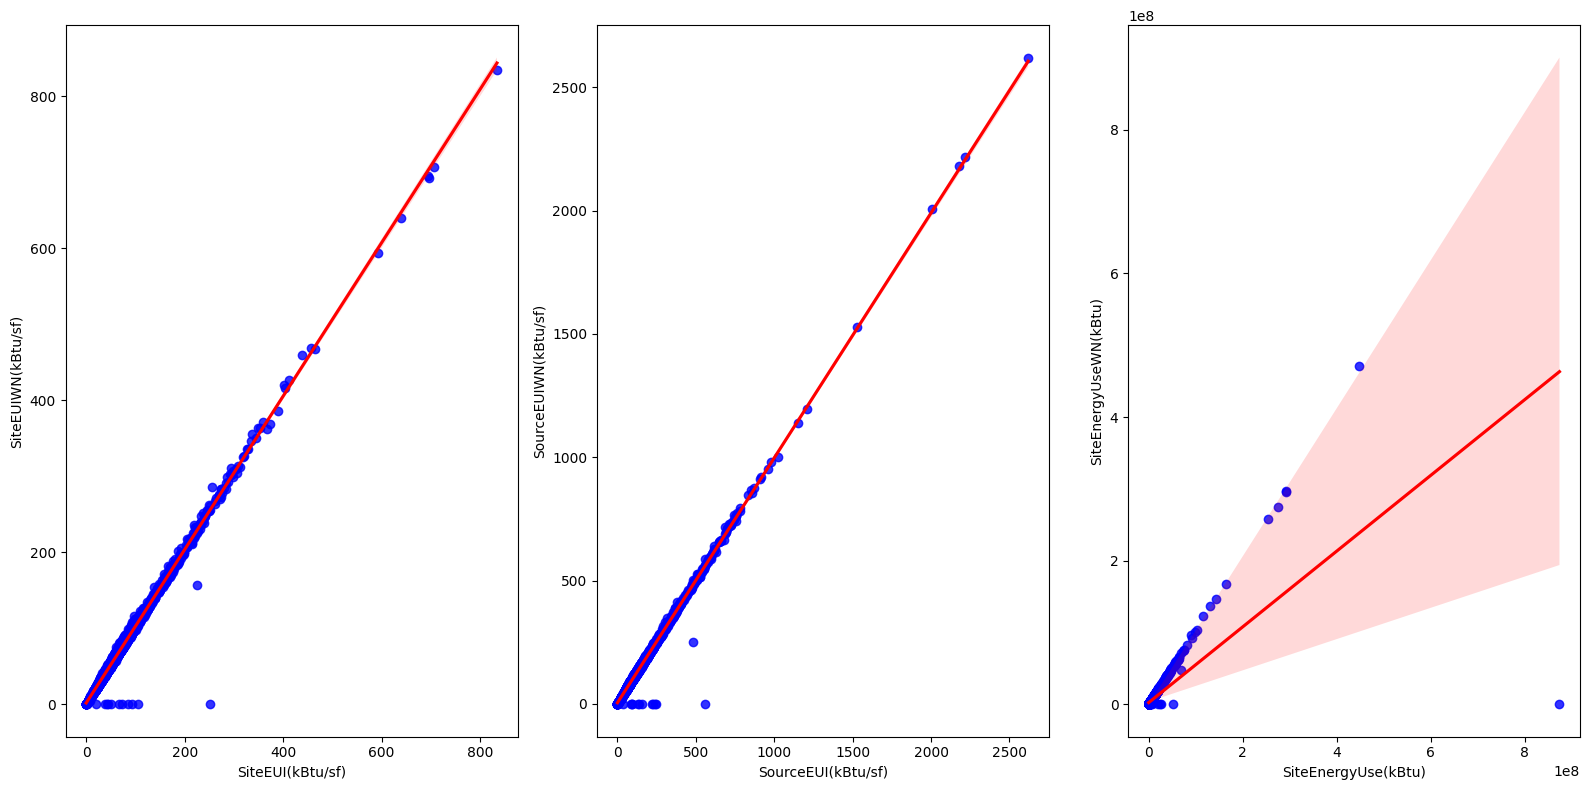

In [674]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,3,1)
sns.regplot(data = building_consumption, x= "SiteEUI(kBtu/sf)",y = "SiteEUIWN(kBtu/sf)", scatter_kws = {"color":"blue"},
           line_kws = {"color":"red"},ci = 95)
ax = fig.add_subplot(1,3,2)
sns.regplot(data = building_consumption, x= "SourceEUI(kBtu/sf)",y = "SourceEUIWN(kBtu/sf)", scatter_kws = {"color":"blue"},
           line_kws = {"color":"red"},ci = 95)
ax = fig.add_subplot(1,3,3)

sns.regplot(data = building_consumption, x= "SiteEnergyUse(kBtu)",y = "SiteEnergyUseWN(kBtu)", scatter_kws = {"color":"blue"},
           line_kws = {"color":"red"},ci = 95)
plt.tight_layout()
plt.show()

building_consumption = building_consumption.drop(["SiteEUIWN(kBtu/sf)","SourceEUIWN(kBtu/sf)","SiteEnergyUseWN(kBtu)"],axis = 1)

### Detection des outliers (IQR)

In [675]:
building_consumption.shape

(3356, 28)

In [676]:
for col in ["SteamUse(kBtu)","Electricity(kBtu)","NaturalGas(kBtu)","TotalGHGEmissions","SiteEnergyUse(kBtu)"]:
    quartiles = building_consumption[col].quantile([0.25,0.75])
    IQR = quartiles.iloc[1] - quartiles.iloc[0]
    mask = (building_consumption[col] < quartiles.iloc[0] - 1.5 * IQR) | (building_consumption[col] > quartiles.iloc[1] + 1.5 * IQR) 
    print({f"After outiers shape is : {building_consumption[~mask].shape}": col})

{'After outiers shape is : (3226, 28)': 'SteamUse(kBtu)'}
{'After outiers shape is : (2966, 28)': 'Electricity(kBtu)'}
{'After outiers shape is : (3021, 28)': 'NaturalGas(kBtu)'}
{'After outiers shape is : (2990, 28)': 'TotalGHGEmissions'}
{'After outiers shape is : (2974, 28)': 'SiteEnergyUse(kBtu)'}


In [677]:
## On supprime les outliers
quartiles = building_consumption[col].quantile([0.25,0.75])
IQR = quartiles.iloc[1] - quartiles.iloc[0]
mask = (building_consumption["SteamUse(kBtu)"] < quartiles.iloc[0] - 1.5 * IQR) | (building_consumption["SteamUse(kBtu)"] > quartiles.iloc[1] + 1.5 * IQR) 
building_consumption = building_consumption[~mask]
mask_2 = (building_consumption["Electricity(kBtu)"] < quartiles.iloc[0] - 1.5 * IQR) | (building_consumption["Electricity(kBtu)"] > quartiles.iloc[1] + 1.5 * IQR) 
building_consumption = building_consumption[~mask_2]
mask_3 = (building_consumption["NaturalGas(kBtu)"] < quartiles.iloc[0] - 1.5 * IQR) | (building_consumption["NaturalGas(kBtu)"] > quartiles.iloc[1] + 1.5 * IQR) 
building_consumption = building_consumption[~mask_3]
mask_4 = (building_consumption["TotalGHGEmissions"] < quartiles.iloc[0] - 1.5 * IQR) | (building_consumption["TotalGHGEmissions"] > quartiles.iloc[1] + 1.5 * IQR) 
building_consumption = building_consumption[~mask_4]
mask_5 = (building_consumption["SiteEnergyUse(kBtu)"] < quartiles.iloc[0] - 1.5 * IQR) | (building_consumption["SiteEnergyUse(kBtu)"] > quartiles.iloc[1] + 1.5 * IQR) 
building_consumption = building_consumption[~mask_5]



In [678]:
## On retire les colonnes SiteEUI (kBtu/sf) et SourceEUI (kBtu/sf) pour prévenir toute fuite de données.
## par example ## SiteEnergyUse(kBtu)/PropertyGFATotal = SiteEUI(kBtu/sf)
building_consumption.iloc[0,:]
7226362.5/88434
building_consumption = building_consumption.drop(["SiteEUI(kBtu/sf)","SourceEUI(kBtu/sf)"],axis = 1)

In [679]:
## On retire la colonne emission_intensite pour prévenir toute fuite de donnée
## par example intensite = Emission_total/PropertyGFATotal
building_consumption = building_consumption.drop("GHGEmissionsIntensity",axis = 1)

In [680]:
## On garde que les batiments compliants et Data 
building_consumption.ComplianceStatus.value_counts()
mask = building_consumption.ComplianceStatus == "Compliant"
building_consumption = building_consumption[mask]

In [681]:
building_consumption.ComplianceStatus.value_counts()
building_consumption.DefaultData.value_counts()
building_consumption = building_consumption.drop(["ComplianceStatus","DefaultData"],axis =1)

In [682]:
## on retire les colonnes redundantes avec les unite de misure differentes et on garde celles avec kBtu

building_consumption = building_consumption.drop(["NaturalGas(therms)","Electricity(kWh)"],axis =1)

In [683]:
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 0 to 3375
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     2822 non-null   object 
 1   PrimaryPropertyType              2822 non-null   object 
 2   Neighborhood                     2822 non-null   object 
 3   YearBuilt                        2822 non-null   int64  
 4   NumberofBuildings                2822 non-null   float64
 5   NumberofFloors                   2822 non-null   int64  
 6   PropertyGFATotal                 2822 non-null   int64  
 7   PropertyGFAParking               2822 non-null   int64  
 8   PropertyGFABuilding(s)           2822 non-null   int64  
 9   LargestPropertyUseType           2822 non-null   object 
 10  LargestPropertyUseTypeGFA        2822 non-null   float64
 11  SecondLargestPropertyUseType     2822 non-null   object 
 12  SecondLargestPropertyUseT

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

# Modélisation 

### Import des modules 

In [684]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
RandomizedSearchCV,
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from category_encoders import OneHotEncoder,BinaryEncoder

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor



### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

In [685]:
# On dérive une nouvelle variable building age (âge du bâtiment) à partir de year built, 
## afin de l’utiliser comme feature dans le modèle

building_consumption["building_age"] = 2016 - building_consumption["YearBuilt"]

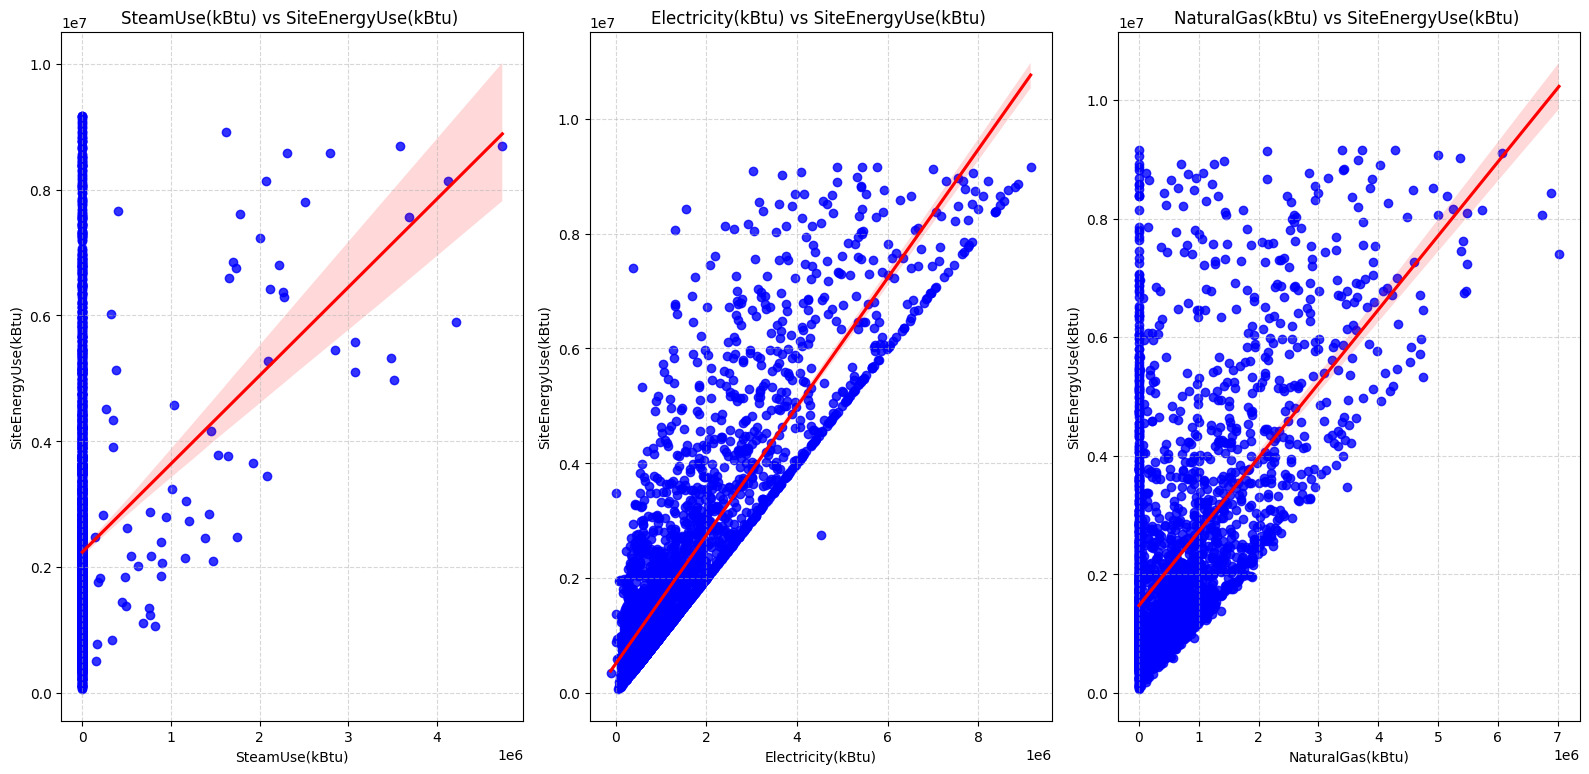

In [686]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,3,1)
sns.regplot(data = building_consumption, x ="SteamUse(kBtu)", y= "SiteEnergyUse(kBtu)",ci = 95,scatter_kws= {"color":"blue"},line_kws= {"color":"red"} )
ax.set_title("SteamUse(kBtu) vs SiteEnergyUse(kBtu) ")
ax.xaxis.grid(True, linestyle="--",alpha = 0.5)
ax.yaxis.grid(True, linestyle="--",alpha = 0.5)

ax = fig.add_subplot(1,3,2)
sns.regplot(data = building_consumption, x ="Electricity(kBtu)", y= "SiteEnergyUse(kBtu)",ci = 95,scatter_kws= {"color":"blue"},line_kws= {"color":"red"} )
ax.set_title("Electricity(kBtu) vs SiteEnergyUse(kBtu) ")
ax.xaxis.grid(True, linestyle="--",alpha = 0.5)
ax.yaxis.grid(True, linestyle="--",alpha = 0.5)

ax = fig.add_subplot(1,3,3)
sns.regplot(data = building_consumption, x ="NaturalGas(kBtu)", y= "SiteEnergyUse(kBtu)",ci = 95,scatter_kws= {"color":"blue"},line_kws= {"color":"red"} )
ax.set_title("NaturalGas(kBtu) vs SiteEnergyUse(kBtu) ")
ax.xaxis.grid(True, linestyle="--",alpha = 0.5)
ax.yaxis.grid(True, linestyle="--",alpha = 0.5)

plt.tight_layout()
plt.show()

In [687]:
building_consumption[["SteamUse(kBtu)","Electricity(kBtu)","NaturalGas(kBtu)","SiteEnergyUse(kBtu)"]].corr()

,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),SiteEnergyUse(kBtu)
SteamUse(kBtu),1.000000,0.091108,-0.024516,0.204896
Electricity(kBtu),0.091108,1.000000,0.161958,0.863803
NaturalGas(kBtu),-0.024516,0.161958,1.000000,0.610347
SiteEnergyUse(kBtu),0.204896,0.863803,0.610347,1.000000


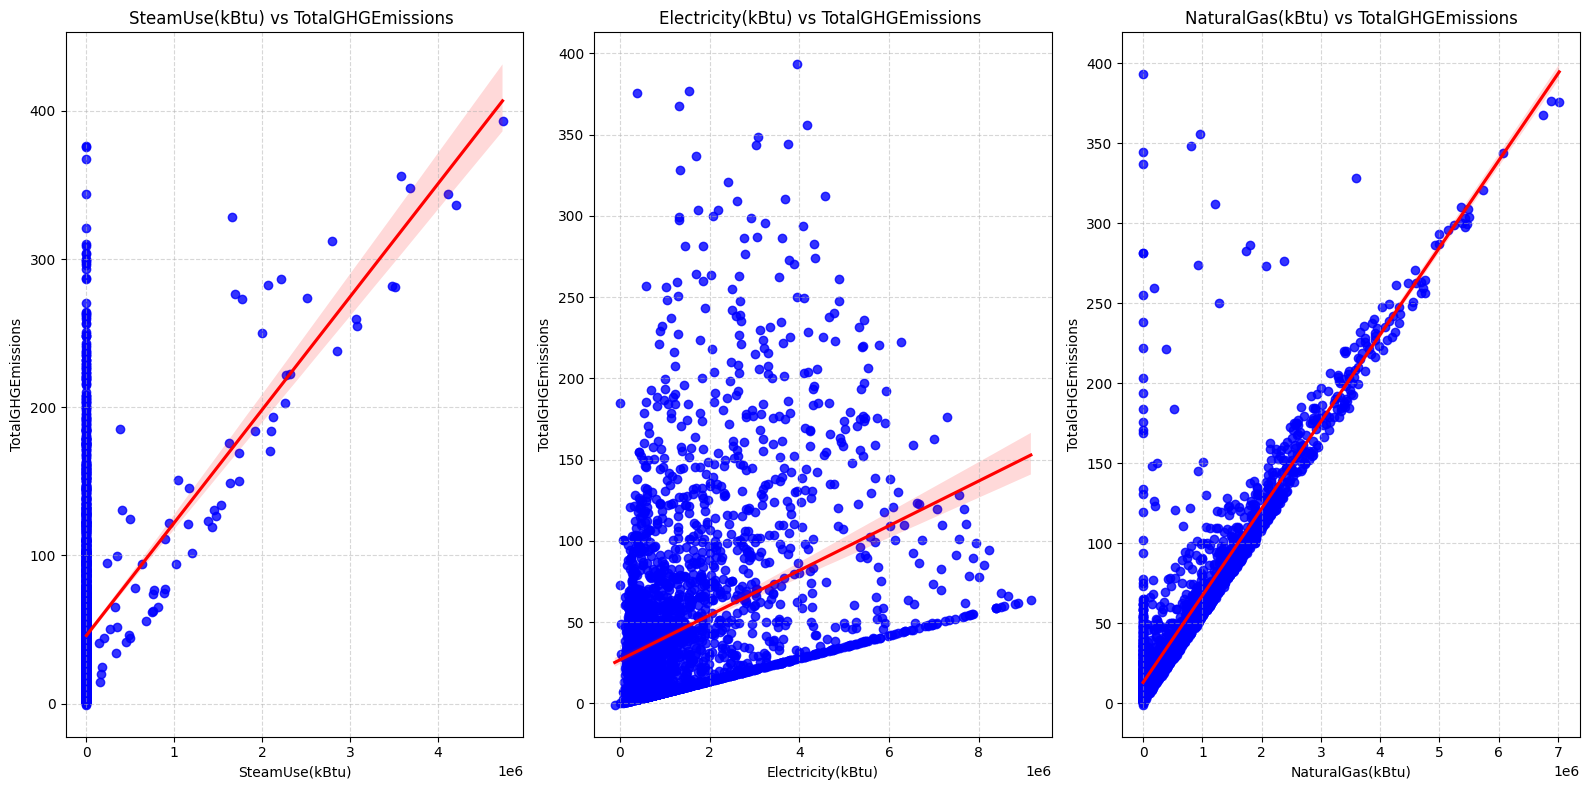

In [688]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,3,1)
sns.regplot(data = building_consumption, x ="SteamUse(kBtu)", y= "TotalGHGEmissions",ci = 95,scatter_kws= {"color":"blue"},line_kws= {"color":"red"} )
ax.set_title("SteamUse(kBtu) vs TotalGHGEmissions ")
ax.xaxis.grid(True, linestyle="--",alpha = 0.5)
ax.yaxis.grid(True, linestyle="--",alpha = 0.5)

ax = fig.add_subplot(1,3,2)
sns.regplot(data = building_consumption, x ="Electricity(kBtu)", y= "TotalGHGEmissions",ci = 95,scatter_kws= {"color":"blue"},line_kws= {"color":"red"} )
ax.set_title("Electricity(kBtu) vs TotalGHGEmissions ")
ax.xaxis.grid(True, linestyle="--",alpha = 0.5)
ax.yaxis.grid(True, linestyle="--",alpha = 0.5)

ax = fig.add_subplot(1,3,3)
sns.regplot(data = building_consumption, x ="NaturalGas(kBtu)", y= "TotalGHGEmissions",ci = 95,scatter_kws= {"color":"blue"},line_kws= {"color":"red"} )
ax.set_title("NaturalGas(kBtu) vs TotalGHGEmissions")
ax.xaxis.grid(True, linestyle="--",alpha = 0.5)
ax.yaxis.grid(True, linestyle="--",alpha = 0.5)

plt.tight_layout()
plt.show()

In [689]:
building_consumption[["SteamUse(kBtu)","Electricity(kBtu)","NaturalGas(kBtu)","TotalGHGEmissions"]].corr()

,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
SteamUse(kBtu),1.000000,0.091108,-0.024516,0.376423
Electricity(kBtu),0.091108,1.000000,0.161958,0.359169
NaturalGas(kBtu),-0.024516,0.161958,1.000000,0.899538
TotalGHGEmissions,0.376423,0.359169,0.899538,1.000000


In [690]:
## Transformer les features plus correlèes avec les variables cibles pour eviter la fuite des donnèes
# Electricity binary
elec_threshold = building_consumption["Electricity(kBtu)"].median()
building_consumption["electricity_binary"] = (building_consumption["Electricity(kBtu)"] > elec_threshold).astype(int)

# Gas binary
gas_threshold = building_consumption["NaturalGas(kBtu)"].median()
building_consumption["natural_gas_binary"] = (building_consumption["NaturalGas(kBtu)"] > gas_threshold).astype(int)

# Steam binary
steam_threshold = building_consumption["SteamUse(kBtu)"].median()
building_consumption["steam_binary"] = (building_consumption["SteamUse(kBtu)"] > steam_threshold).astype(int)


### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation.
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne.

In [691]:
building_consumption = building_consumption.drop("YearBuilt", axis = 1)

In [692]:
## encoder le building type
enc_build_type = OneHotEncoder()

In [693]:
Building_type_labels = enc_build_type.fit_transform(building_consumption.BuildingType.values.reshape(-1,1))


In [694]:
Building_type_labels = Building_type_labels.rename(columns ={"0_1":"prop_type_1","0_2":"prop_type_2",
                                     "0_3":"prop_type_3",
                                     "0_4":"prop_type_4",
                                     "0_5":"prop_type_5",
                                     "0_6":"prop_type_6",
                                     "0_7":"prop_type_7"})

In [695]:
Building_type_labels.reset_index(drop=True, inplace = True)
building_consumption.reset_index(drop= True, inplace = True)

In [696]:
building_consumption = pd.concat([building_consumption,Building_type_labels.iloc[:,:-1]],axis = 1)

In [697]:
building_consumption.drop("BuildingType",axis = 1)

,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,...,electricity_binary,natural_gas_binary,steam_binary,prop_type_1,prop_type_2,prop_type_3,prop_type_4,prop_type_5,prop_type_6,prop_type_7
0,Hotel,downtown,1.0,12,88434,0,88434,Hotel,88434.0,None,...,1,1,1,1,0,0,0,0,0,0
1,Hotel,downtown,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,...,1,1,0,1,0,0,0,0,0,0
2,Hotel,downtown,1.0,10,61320,0,61320,Hotel,61320.0,None,...,1,1,1,1,0,0,0,0,0,0
3,Hotel,downtown,1.0,11,83008,0,83008,Hotel,81352.0,None,...,1,1,0,1,0,0,0,0,0,0
4,Other,downtown,1.0,8,102761,0,102761,Other - Entertainment/Public Assembly,102761.0,None,...,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,Other,delridge,1.0,1,18261,0,18261,Other - Recreation,18261.0,None,...,0,1,0,0,0,0,1,0,0,0
2818,Other,downtown,1.0,1,16000,0,16000,Other - Recreation,16000.0,None,...,0,1,0,0,0,0,1,0,0,0
2819,Other,magnolia / queen anne,1.0,1,13157,0,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,...,1,1,0,0,0,0,1,0,0,0
2820,Mixed Use Property,greater duwamish,1.0,1,14101,0,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,...,0,1,0,0,0,0,1,0,0,0


In [698]:
encode_bi = BinaryEncoder()

In [699]:
property_bin = encode_bi.fit_transform(building_consumption.PrimaryPropertyType)

In [700]:
property_bin

,PrimaryPropertyType_0,PrimaryPropertyType_1,PrimaryPropertyType_2,PrimaryPropertyType_3,PrimaryPropertyType_4
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
2817,0,0,0,1,0
2818,0,0,0,1,0
2819,0,0,0,1,0
2820,0,0,1,0,0


In [701]:
property_bin.reset_index(drop=True,inplace = True)
building_consumption.reset_index(drop= True, inplace = True)

In [702]:
building_consumption = pd.concat([building_consumption,property_bin], axis = 1)
building_consumption = building_consumption.drop("PrimaryPropertyType",axis = 1)

In [703]:
neighborhood_bin = encode_bi.fit_transform(building_consumption["Neighborhood"])
neighborhood_bin.reset_index(drop=True,inplace = True)
building_consumption.reset_index(drop= True, inplace = True)
building_consumption = pd.concat([building_consumption,neighborhood_bin], axis = 1)
building_consumption = building_consumption.drop("Neighborhood",axis = 1)

In [704]:
LargestPropertyUseType_bin = encode_bi.fit_transform(building_consumption["LargestPropertyUseType"])
LargestPropertyUseType_bin.reset_index(drop=True,inplace = True)
building_consumption.reset_index(drop= True, inplace = True)
building_consumption = pd.concat([building_consumption,LargestPropertyUseType_bin], axis = 1)
building_consumption = building_consumption.drop("LargestPropertyUseType",axis = 1)

In [705]:
SecondLargestPropertyUseType_bin = encode_bi.fit_transform(building_consumption["SecondLargestPropertyUseType"])
SecondLargestPropertyUseType_bin.reset_index(drop=True,inplace = True)
building_consumption.reset_index(drop= True, inplace = True)
building_consumption = pd.concat([building_consumption,SecondLargestPropertyUseType_bin], axis = 1)
building_consumption = building_consumption.drop("SecondLargestPropertyUseType",axis = 1)

In [706]:
ThirdLargestPropertyUseType_bin = encode_bi.fit_transform(building_consumption["ThirdLargestPropertyUseType"])
ThirdLargestPropertyUseType_bin.reset_index(drop=True,inplace = True)
building_consumption.reset_index(drop= True, inplace = True)
building_consumption = pd.concat([building_consumption,ThirdLargestPropertyUseType_bin], axis = 1)
building_consumption = building_consumption.drop("ThirdLargestPropertyUseType",axis = 1)

In [707]:
building_consumption = building_consumption.drop("BuildingType",axis = 1)

In [708]:
building_consumption = building_consumption.drop(["SteamUse(kBtu)","NaturalGas(kBtu)","Electricity(kBtu)"],axis = 1)

In [709]:
building_consumption.columns

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'building_age',
       'electricity_binary', 'natural_gas_binary', 'steam_binary',
       'prop_type_1', 'prop_type_2', 'prop_type_3', 'prop_type_4',
       'prop_type_5', 'prop_type_6', 'prop_type_7', 'PrimaryPropertyType_0',
       'PrimaryPropertyType_1', 'PrimaryPropertyType_2',
       'PrimaryPropertyType_3', 'PrimaryPropertyType_4', 'Neighborhood_0',
       'Neighborhood_1', 'Neighborhood_2', 'Neighborhood_3',
       'LargestPropertyUseType_0', 'LargestPropertyUseType_1',
       'LargestPropertyUseType_2', 'LargestPropertyUseType_3',
       'LargestPropertyUseType_4', 'LargestPropertyUseType_5',
       'SecondLargestPropertyUseType_0', 'SecondLargestPropertyUseType_1',
       'Secon

In [710]:
cols = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA','building_age',
       'prop_type_1',
       'prop_type_2', 'prop_type_3', 'prop_type_4', 'prop_type_5',
       'prop_type_6', 'prop_type_7', 'PrimaryPropertyType_0',
       'PrimaryPropertyType_1', 'PrimaryPropertyType_2',
       'PrimaryPropertyType_3', 'PrimaryPropertyType_4', 'Neighborhood_0',
       'Neighborhood_1', 'Neighborhood_2', 'Neighborhood_3',
       'LargestPropertyUseType_0', 'LargestPropertyUseType_1',
       'LargestPropertyUseType_2', 'LargestPropertyUseType_3',
       'LargestPropertyUseType_4', 'LargestPropertyUseType_5',
       'SecondLargestPropertyUseType_0', 'SecondLargestPropertyUseType_1',
       'SecondLargestPropertyUseType_2', 'SecondLargestPropertyUseType_3',
       'SecondLargestPropertyUseType_4', 'SecondLargestPropertyUseType_5',
       'ThirdLargestPropertyUseType_0', 'ThirdLargestPropertyUseType_1',
       'ThirdLargestPropertyUseType_2', 'ThirdLargestPropertyUseType_3',
       'ThirdLargestPropertyUseType_4', 'ThirdLargestPropertyUseType_5',
        'electricity_binary', 'natural_gas_binary', 'steam_binary','ENERGYSTARScore',
        'TotalGHGEmissions','SiteEnergyUse(kBtu)']

In [711]:
df = building_consumption[cols]

In [712]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NumberofBuildings                2822 non-null   float64
 1   NumberofFloors                   2822 non-null   int64  
 2   PropertyGFATotal                 2822 non-null   int64  
 3   PropertyGFAParking               2822 non-null   int64  
 4   PropertyGFABuilding(s)           2822 non-null   int64  
 5   LargestPropertyUseTypeGFA        2822 non-null   float64
 6   SecondLargestPropertyUseTypeGFA  2822 non-null   float64
 7   ThirdLargestPropertyUseTypeGFA   2822 non-null   float64
 8   building_age                     2822 non-null   int64  
 9   prop_type_1                      2822 non-null   int64  
 10  prop_type_2                      2822 non-null   int64  
 11  prop_type_3                      2822 non-null   int64  
 12  prop_type_4         

In [713]:

df["NumberofBuildings"] = df["NumberofBuildings"].astype(int)

### Comparaison de différents modèles supervisés


A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [714]:
##Transformer les variables cibles par le log1 pour reduire les skewness des donnes
X = df.iloc[:,:-2]
y = df[["TotalGHGEmissions","SiteEnergyUse(kBtu)"]]
y_log = np.log1p(y)

In [715]:
X_train,X_test,y_train,y_test = train_test_split(X,y_log,test_size = 0.2, random_state = 42)
model = LinearRegression()

In [716]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [717]:
# for test metrics emissions
y_predict_test = model.predict(X_test)
print({"r2_score":r2_score(y_test,y_predict_test),
      "MSE":mean_squared_error(y_test,y_predict_test),
      "MAE":mean_absolute_error(y_test,y_predict_test)})

{'r2_score': 0.7614869354113536, 'MSE': 0.22757856380018457, 'MAE': 0.3505245133309619}


In [718]:
# for train metrics emissions
y_predict_train = model.predict(X_train)
print({"r2_score":r2_score(y_train,y_predict_train),
      "MSE":mean_squared_error(y_train,y_predict_train),
      "MAE":mean_absolute_error(y_train,y_predict_train)})

{'r2_score': 0.8046068569156526, 'MSE': 0.19726526476871659, 'MAE': 0.3340061538218546}


In [719]:
model = RandomForestRegressor(n_estimators = 500, 
                             max_depth = None)
X_train,X_test,y_train,y_test = train_test_split(X,y_log,test_size = 0.2, random_state = 42)

In [720]:
model.fit(X_train,y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [721]:
# pour test metrics 
y_predict_test = model.predict(X_test)
print({"r2_score":r2_score(y_test,y_predict_test),
      "MSE":mean_squared_error(y_test,y_predict_test),
      "MAE":mean_absolute_error(y_test,y_predict_test)})

{'r2_score': 0.8333099749408153, 'MSE': 0.16072378302375823, 'MAE': 0.2883719696859404}


In [722]:
# pour train metrics 
y_predict_train = model.predict(X_train)
print({"r2_score":r2_score(y_train,y_predict_train),
      "MSE":mean_squared_error(y_train,y_predict_train),
      "MAE":mean_absolute_error(y_train,y_predict_train)})

{'r2_score': 0.9785684858125022, 'MSE': 0.022093329580226945, 'MAE': 0.10660428470067884}


### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn. 

#### Optimisation avec RandomForestRegressor

In [723]:
model = RandomForestRegressor()
param_grid = {"n_estimators":[100,300,500],
             "max_depth":np.arange(1,10,2),
             "max_features":["sqrt","log2",None]}

In [724]:
grid = GridSearchCV(model,param_grid = param_grid, scoring = "r2",verbose =1)

In [725]:
grid.fit(X,y_log)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': array([1, 3, 5, 7, 9]), 'max_features': ['sqrt', 'log2', ...], 'n_estimators': [100, 300, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [726]:
print(grid.best_score_)

0.8041007606296102


In [728]:
print(grid.best_params_)

{'max_depth': np.int64(9), 'max_features': None, 'n_estimators': 300}


In [729]:
X_train,X_test,y_train,y_test = train_test_split(X,y_log,test_size = 0.2, random_state = 8)

In [730]:
model = RandomForestRegressor(
    n_estimators = 300,
    max_depth  = 9,
    max_features = None,
    random_state = 8
)

In [731]:
model.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [732]:
# pour test metrics 
y_predict_test = model.predict(X_test)
print({"r2_score":r2_score(y_test,y_predict_test),
      "MSE":mean_squared_error(y_test,y_predict_test),
      "MAE":mean_absolute_error(y_test,y_predict_test)})

{'r2_score': 0.8264384756056672, 'MSE': 0.16308239542325076, 'MAE': 0.29905166589180604}


In [733]:
# for train metrics 
y_predict_train = model.predict(X_train)
print({"r2_score":r2_score(y_train,y_predict_train),
      "MSE":mean_squared_error(y_train,y_predict_train),
      "MAE":mean_absolute_error(y_train,y_predict_train)})

{'r2_score': 0.9294400677945209, 'MSE': 0.07261418689281232, 'MAE': 0.20248722979610634}


In [734]:
importances = model.feature_importances_

In [735]:
feat_imp = pd.DataFrame({"Feature":X.columns, "Importance":importances}).sort_values(by="Importance",ascending = False).head(15)

In [736]:
feat_imp

,Feature,Importance
44,natural_gas_binary,0.485492
43,electricity_binary,0.258941
2,PropertyGFATotal,0.051416
5,LargestPropertyUseTypeGFA,0.040839
45,steam_binary,0.031129
46,ENERGYSTARScore,0.020460
8,building_age,0.019650
4,PropertyGFABuilding(s),0.017158
9,prop_type_1,0.010956
1,NumberofFloors,0.006993


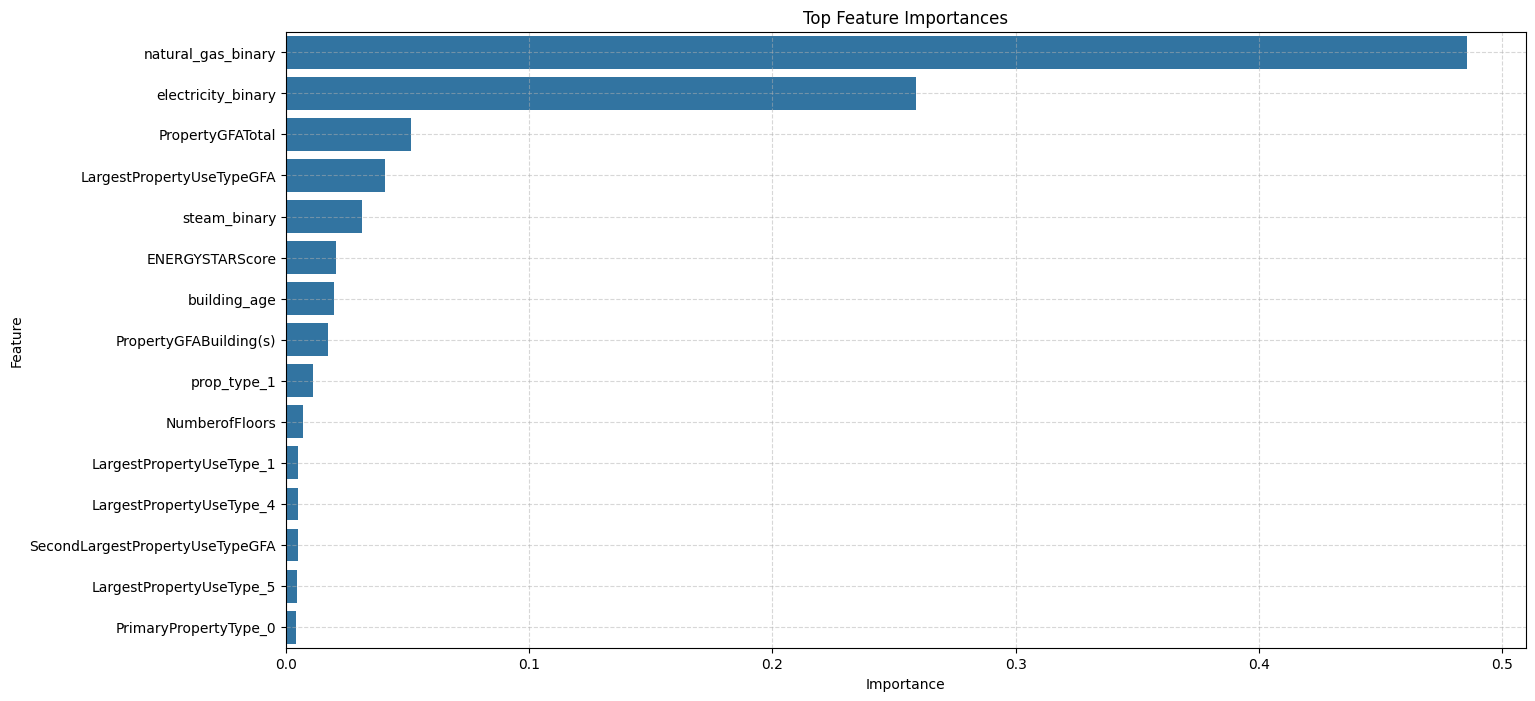

In [737]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
sns.barplot(data=feat_imp,x="Importance",y="Feature") 
plt.title("Top Feature Importances")
ax.xaxis.grid(True, linestyle="--",alpha = 0.5)
ax.yaxis.grid(True, linestyle="--",alpha = 0.5)
plt.show()


#### Optimisation avec GradientBoostingRegressor

In [738]:
model = GradientBoostingRegressor(max_depth = 5, max_features = "sqrt",random_state=42)
multi_model = MultiOutputRegressor(model)


param_grid = {
    "estimator__n_estimators": [500, 800],
    "estimator__learning_rate": [0.1,0.05,0.01],
}


grid = GridSearchCV(
    multi_model,
    param_grid =param_grid,         
    cv=5,
    scoring="r2"
)

In [739]:
grid.fit(X, y_log)

,estimator,MultiOutputRe...dom_state=42))
,param_grid,"{'estimator__learning_rate': [0.1, 0.05, ...], 'estimator__n_estimators': [500, 800]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [740]:
print(grid.best_score_)

0.8258408667607974


In [741]:
print(grid.best_params_)

{'estimator__learning_rate': 0.05, 'estimator__n_estimators': 500}


In [742]:
base_model = GradientBoostingRegressor(
    n_estimators= 500,
    learning_rate= 0.05,
    random_state=42
)

multi_model = MultiOutputRegressor(base_model)

In [743]:
X_train,X_test,y_train,y_test = train_test_split(X,y_log,test_size = 0.2, random_state = 8)

In [744]:
multi_model.fit(X_train,y_train)

,estimator,GradientBoost...ndom_state=42)
,n_jobs,None
,loss,'squared_error'
,learning_rate,0.05
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3


In [745]:
y_predict_test = multi_model.predict(X_test)
print({"r2_score":r2_score(y_test,y_predict_test),
      "MSE":mean_squared_error(y_test,y_predict_test),
      "MAE":mean_absolute_error(y_test,y_predict_test)})

{'r2_score': 0.8389620044212613, 'MSE': 0.15491654978365746, 'MAE': 0.28970394491067664}


In [746]:
y_predict_train = multi_model.predict(X_train)
print({"r2_score":r2_score(y_train,y_predict_train),
      "MSE":mean_squared_error(y_train,y_predict_train),
      "MAE":mean_absolute_error(y_train,y_predict_train)})

{'r2_score': 0.9161465736624791, 'MSE': 0.08798581182369568, 'MAE': 0.21805760185769205}


In [747]:
importances_2 = {}

for i, est in enumerate(best_model.estimators_):
    target_name = y_train.columns[i] if hasattr(y_train, "columns") else f"target_{i}"
    importances_2[target_name] = est.feature_importances_


In [748]:
avg_importances = []

for i, feature in enumerate(X_train.columns):
    # get importance from each target
    imp_target1 = best_model.estimators_[0].feature_importances_[i]
    imp_target2 = best_model.estimators_[1].feature_importances_[i]
    
    avg_imp = (imp_target1 + imp_target2) / 2
    
    avg_importances.append({"feature": feature, "importance": avg_imp})

feat_importances_df = pd.DataFrame(avg_importances)

feat_importances_df = feat_importances_df.sort_values("importance", ascending=False).head(10)

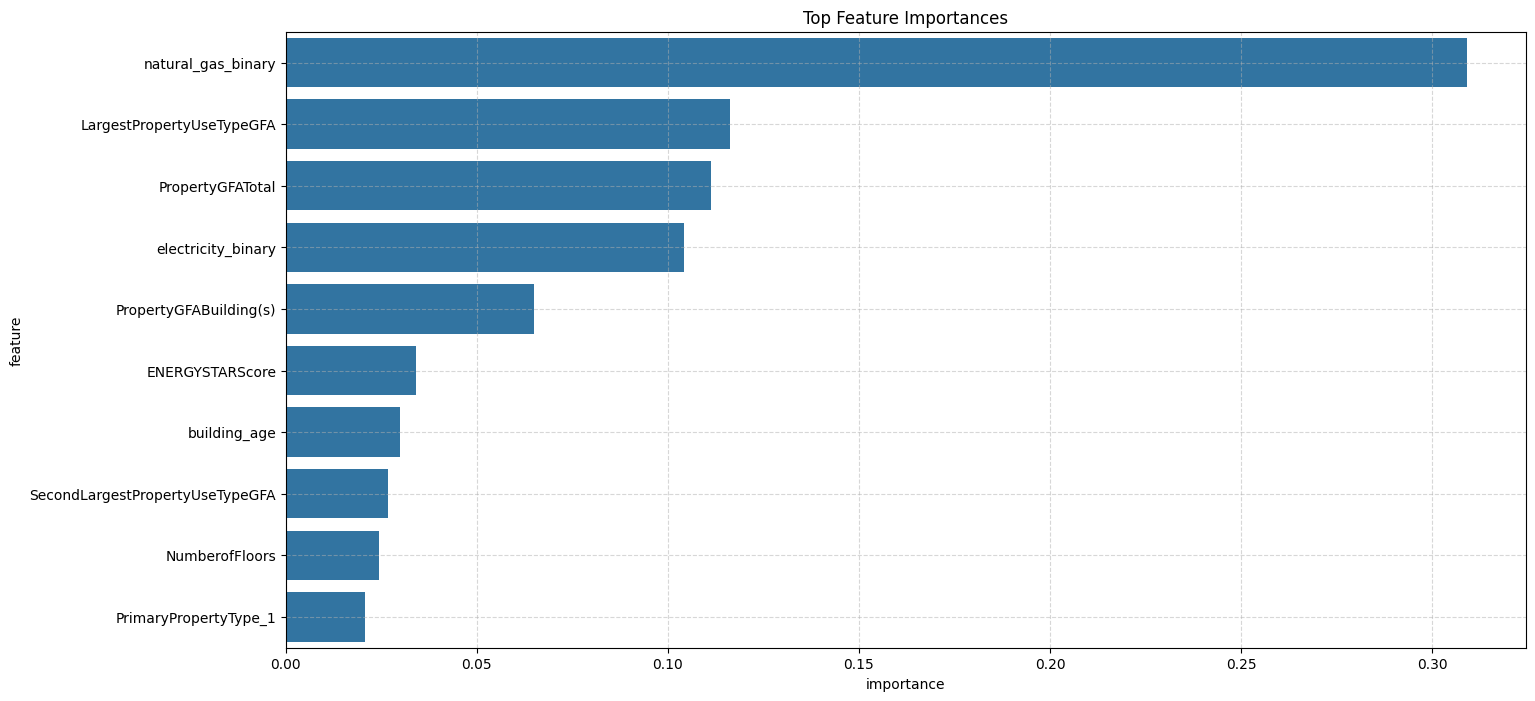

In [749]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
sns.barplot(data=feat_importances_df,x="importance",y="feature") 
plt.title("Top Feature Importances")
ax.xaxis.grid(True, linestyle="--",alpha = 0.5)
ax.yaxis.grid(True, linestyle="--",alpha = 0.5)
plt.show()


#### Un modele uniquement avec les donnèes structurelles des batiment en enlevant (Vapeur, electricitè et Gaz)

In [781]:
df_2 = df.drop(['electricity_binary', 'natural_gas_binary', 'steam_binary','ENERGYSTARScore'],axis =1)

In [782]:
X = df_2.iloc[:,:-2]

In [783]:
y =df_2.iloc[:,-2:]

In [784]:
y_log = np.log1p(y)

#### Regression linèare

In [785]:
X_train,X_test,y_train,y_test = train_test_split(X,y_log,test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
# for test metrics emissions
y_predict_test = model.predict(X_test)
print({"r2_score":r2_score(y_test,y_predict_test),
      "MSE":mean_squared_error(y_test,y_predict_test),
      "MAE":mean_absolute_error(y_test,y_predict_test)})

{'r2_score': 0.3945711579915108, 'MSE': 0.6180803219849015, 'MAE': 0.5975897229806428}


In [786]:
# for train metrics emissions
y_predict_train = model.predict(X_train)
print({"r2_score":r2_score(y_train,y_predict_train),
      "MSE":mean_squared_error(y_train,y_predict_train),
      "MAE":mean_absolute_error(y_train,y_predict_train)})

{'r2_score': 0.46965274262965356, 'MSE': 0.5842787113941748, 'MAE': 0.5966204950562658}


#### Random Forest

In [787]:
model = RandomForestRegressor()
param_grid = {"n_estimators":[100,300,500],
             "max_depth":np.arange(1,10,2),
             "max_features":["sqrt","log2",None]}

In [758]:
grid = GridSearchCV(model,param_grid = param_grid, scoring = "r2",verbose =1)
grid.fit(X,y_log)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': array([1, 3, 5, 7, 9]), 'max_features': ['sqrt', 'log2', ...], 'n_estimators': [100, 300, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [759]:
print(grid.best_score_)

0.4912701734032462


In [760]:
print(grid.best_params_)

{'max_depth': np.int64(9), 'max_features': 'sqrt', 'n_estimators': 300}


In [788]:
model = RandomForestRegressor(max_depth = 9,
                             max_features = "sqrt",
                             n_estimators = 300)

model.fit(X_train,y_train)
# for test metrics emissions
y_predict_test = model.predict(X_test)
print({"r2_score":r2_score(y_test,y_predict_test),
      "MSE":mean_squared_error(y_test,y_predict_test),
      "MAE":mean_absolute_error(y_test,y_predict_test)})

{'r2_score': 0.5370224380993361, 'MSE': 0.47571327122170537, 'MAE': 0.5192352588958647}


In [789]:
# for train metrics emissions
y_predict_train = model.predict(X_train)
print({"r2_score":r2_score(y_train,y_predict_train),
      "MSE":mean_squared_error(y_train,y_predict_train),
      "MAE":mean_absolute_error(y_train,y_predict_train)})

{'r2_score': 0.7054808740215854, 'MSE': 0.3289409384331815, 'MAE': 0.4363913120069828}


In [790]:
importances = model.feature_importances_

In [791]:
feat_imp = pd.DataFrame({"Feature":X.columns, "Importance":importances}).sort_values(by="Importance",ascending = False).head(15)

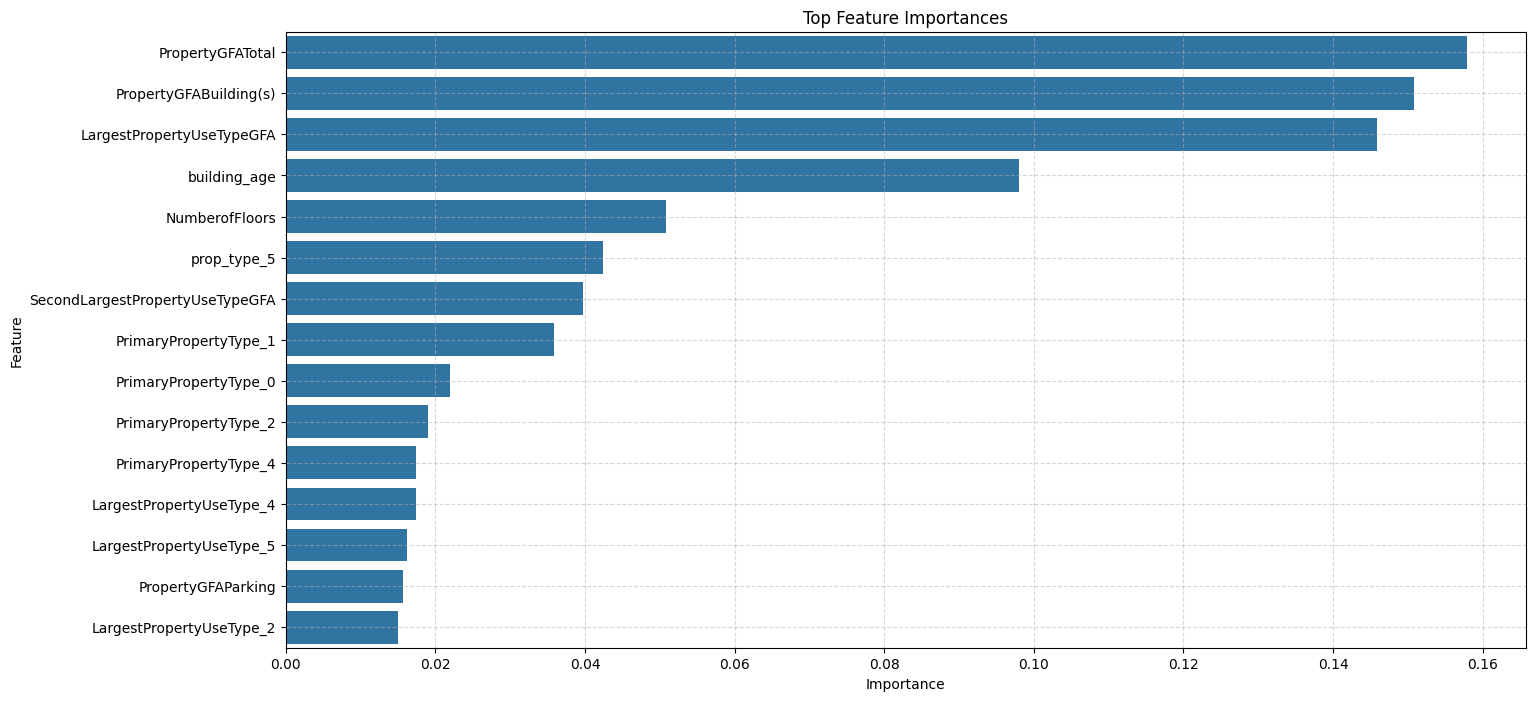

In [792]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
sns.barplot(data=feat_imp,x="Importance",y="Feature") 
plt.title("Top Feature Importances")
ax.xaxis.grid(True, linestyle="--",alpha = 0.5)
ax.yaxis.grid(True, linestyle="--",alpha = 0.5)
plt.show()


#### avec GradiantBoosting

In [793]:
model = GradientBoostingRegressor(max_depth = 9, max_features = "sqrt", random_state = 8)
multi_model = MultiOutputRegressor(model)


param_grid = {
    "estimator__n_estimators": [500, 800],
    "estimator__learning_rate": [0.1,0.05,0.01]
}


grid = GridSearchCV(
    multi_model,
    param_grid =param_grid,         
    cv=5,
    scoring="r2"
)

In [794]:
grid.fit(X,y_log)

,estimator,MultiOutputRe...ndom_state=8))
,param_grid,"{'estimator__learning_rate': [0.1, 0.05, ...], 'estimator__n_estimators': [500, 800]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [795]:
print(grid.best_score_)

0.5184517851026602


In [796]:
print(grid.best_params_)

{'estimator__learning_rate': 0.01, 'estimator__n_estimators': 500}


In [797]:
model = GradientBoostingRegressor(max_depth = 9, max_features = "sqrt", random_state = 8,
                                 learning_rate = 0.01,
                                 n_estimators = 500)
multi_model = MultiOutputRegressor(model)


In [798]:
multi_model.fit(X_train,y_train)

,estimator,GradientBoost...andom_state=8)
,n_jobs,None
,loss,'squared_error'
,learning_rate,0.01
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,9


In [799]:
# for test metrics 
y_predict_test = multi_model.predict(X_test)
print({"r2_score":r2_score(y_test,y_predict_test),
      "MSE":mean_squared_error(y_test,y_predict_test),
      "MAE":mean_absolute_error(y_test,y_predict_test)})

{'r2_score': 0.5603277818686556, 'MSE': 0.4537809612912291, 'MAE': 0.49032242613284316}


In [800]:
y_predict_train = multi_model.predict(X_train)
print({"r2_score":r2_score(y_train,y_predict_train),
      "MSE":mean_squared_error(y_train,y_predict_train),
      "MAE":mean_absolute_error(y_train,y_predict_train)})

{'r2_score': 0.9147926889200502, 'MSE': 0.09708179351205666, 'MAE': 0.2141600606158155}
